In [ ]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# labeling_test

> different tool for automation process of labeling will be tested here

This repo code mostly taken from [here](https://github.com/NielsRogge/Transformers-Tutorials/blob/master/PerSAM/Personalize_SAM_with_one_shot_using_Hugging_Face.ipynb)

## Install

```sh
git clone git@github.com:HasanGoni/labeling_test.git
cd labelling_test
pip install -e .
```

In [ ]:
from huggingface_hub import hf_hub_download
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torchvision.transforms.functional import resize, to_pil_image
import numpy as  np
from pathlib import Path
from typing import Tuple, List, Union
from transformers import AutoProcessor, SamModel

## How to use

In [ ]:
#| hide
from labeling_test.core import *
from labeling_test.os_persam import *


## Get data

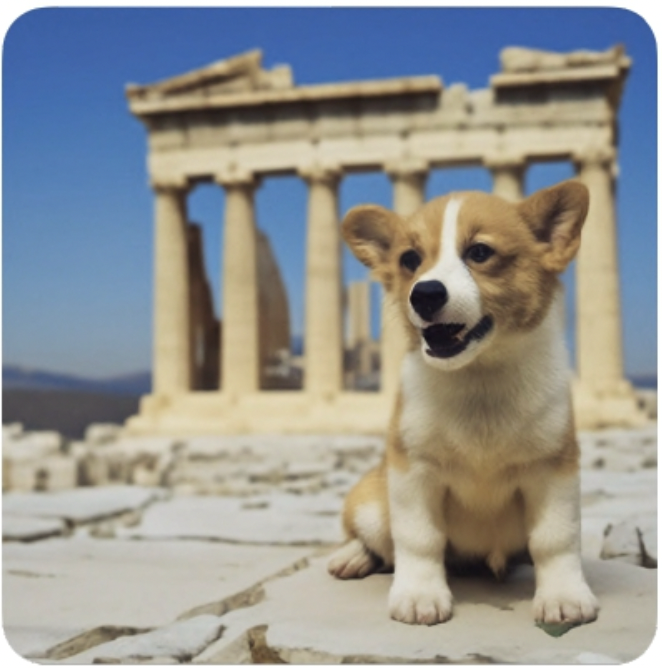

In [ ]:
# Downloading from Niels_rogge hugging face repo
# image file
file_name = hf_hub_download(repo_id="nielsr/persam-dog", filename="dog.jpg", repo_type="dataset")
# image mask file
m_file_name = hf_hub_download(repo_id="nielsr/persam-dog", filename="dog_mask.png", repo_type="dataset")
tst_im_path = hf_hub_download(
    repo_id="nielsr/persam-dog", 
    filename="new_dog.jpg", 
    repo_type="dataset")

ref_image = Image.open(file_name).convert('RGB')
ref_mask = cv2.imread(m_file_name)
ref_mask = cv2.cvtColor(ref_mask, cv2.COLOR_BGR2RGB)
tst_img = Image.open(tst_im_path).convert('RGB')
ref_image

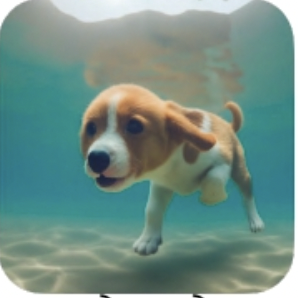

In [ ]:
tst_img

### getting model

In [ ]:
processor = AutoProcessor.from_pretrained("facebook/sam-vit-huge")
# model = PerSamModel.from_pretrained("facebook/sam-vit-huge")
model = SamModel.from_pretrained("facebook/sam-vit-huge")
     

### getting first prediciton mask 

In [ ]:
device='cuda'

In [ ]:
outputs, tst_feat,topk_xy, topk_label, input_sam, best_idx = get_first_prediction(
                                        ref_img=ref_image,
                                        ref_msk=ref_mask,
                                        tst_img=tst_img,
                                        model=model,
                                        processor=processor, 
                                        device=device,
                                        print_=False)


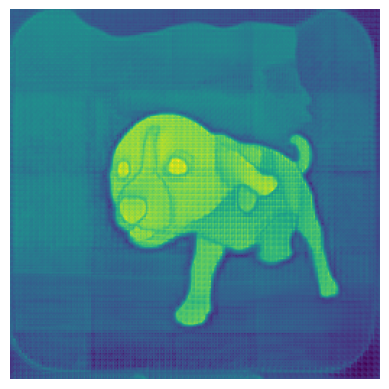

In [ ]:
show_(outputs['pred_masks'].to('cpu').numpy()[0][0][0])

In [ ]:
outputs_fr,_, _, _,masks_fr = get_first_refined_mask(
    ref_image=ref_image,
    ref_mask=ref_mask,
    tst_img=tst_img,
    processor=processor,
    model=model,
    print_=False,
    device=device,
     )

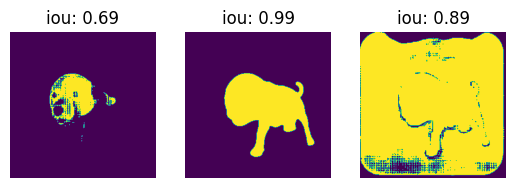

In [ ]:
show_all_masks(masks_fr, outputs=outputs_fr)

In [ ]:
output_f, masks_f = get_last_refined_masks(
    ref_image=ref_image,
    ref_mask=ref_mask,
    processor=processor,
    model=model,
    tst_img=tst_img,
    device='cuda',
    print_=False,
    outputs=outputs_fr,
    masks=masks_fr
)

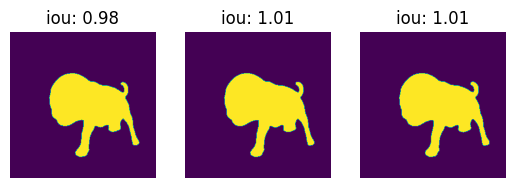

In [ ]:
show_all_masks(masks_f, outputs=output_f)